In [8]:
pip install imbalanced-learn


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------------------- -------------------- 122.9/258.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.1 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\python 3.11\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python 3.11\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
# Data Handling & Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve

# Imbalance Handling
from imblearn.over_sampling import SMOTE

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [76]:
# Load the dataset    

df =pd.read_csv("ICU.csv")

df.head()

,Unnamed: 0,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,1,4,0,87,3,1,1,80,96,1
1,2,8,1,27,1,1,1,142,88,1
2,3,12,1,59,2,0,0,112,80,1
3,4,14,1,77,3,0,0,100,70,0
4,5,27,0,76,3,1,1,128,90,1


In [120]:
# overview of the dataset 
df.shape

(201, 28)

In [121]:
# Let's walk through into details 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               201 non-null    float64
 1   ID                       201 non-null    float64
 2   Survive                  201 non-null    float64
 3   Age                      201 non-null    float64
 4   AgeGroup                 201 non-null    float64
 5   Sex                      201 non-null    float64
 6   Infection                201 non-null    float64
 7   SysBP                    201 non-null    float64
 8   Pulse                    201 non-null    float64
 9   Emergency                201 non-null    float64
 10  low_bp_flag              201 non-null    float64
 11  high_pulse_flag          201 non-null    float64
 12  hypotension_flag         201 non-null    int32  
 13  tachycardia_flag         201 non-null    int32  
 14  SysBP_min                2

In [122]:
# statistical summary of the dataset 
df.describe()

,Unnamed: 0,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency,...,SysBP_trend,Pulse_trend,AgeGroup_Pulse_1_Low,AgeGroup_Pulse_1_Normal,AgeGroup_Pulse_2_High,AgeGroup_Pulse_2_Low,AgeGroup_Pulse_2_Normal,AgeGroup_Pulse_3_High,AgeGroup_Pulse_3_Low,AgeGroup_Pulse_3_Normal
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.0,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.500000,444.688756,0.800995,57.577015,2.024876,0.378109,0.417910,131.920398,98.766766,0.736318,...,140.0,1.161000e+02,0.014925,0.164179,0.154229,0.019900,0.213930,0.129353,0.039801,0.149254
std,57.683525,271.096691,0.400249,19.979324,0.783823,0.486126,0.494447,30.876587,26.125704,0.441729,...,0.0,1.424634e-14,0.121557,0.371363,0.362070,0.140007,0.411102,0.336428,0.195979,0.357228
min,2.990000,11.960000,0.000000,16.990000,1.000000,0.000000,0.000000,60.000000,45.980000,0.000000,...,140.0,1.161000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,211.000000,1.000000,47.000000,1.000000,0.000000,0.000000,110.000000,80.000000,0.000000,...,140.0,1.161000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,412.500000,1.000000,63.000000,2.000000,0.000000,0.000000,130.000000,96.000000,1.000000,...,140.0,1.161000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,671.000000,1.000000,72.000000,3.000000,1.000000,1.000000,150.000000,118.000000,1.000000,...,140.0,1.161000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,198.010000,924.010000,1.000000,91.000000,3.000000,1.000000,1.000000,200.000000,162.080000,1.000000,...,140.0,1.161000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**2. Handling the missing values** 

Goal: Check for and handle missing values appropriately, either by imputation, dropping rows, or filling with mean/median.

In [123]:
# Check for missing data
print("----------------------------------------")
print(
    f"Missing values in each column:\n{df.isnull().sum().sort_values(ascending=False)}")
print("----------------------------------------")
print(
    f"Percentage of missing values in each column:\n{round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)}")

----------------------------------------
Missing values in each column:
Unnamed: 0                 0
ID                         0
AgeGroup_Pulse_3_Low       0
AgeGroup_Pulse_3_High      0
AgeGroup_Pulse_2_Normal    0
AgeGroup_Pulse_2_Low       0
AgeGroup_Pulse_2_High      0
AgeGroup_Pulse_1_Normal    0
AgeGroup_Pulse_1_Low       0
Pulse_trend                0
SysBP_trend                0
Pulse_max                  0
Pulse_min                  0
SysBP_max                  0
SysBP_min                  0
tachycardia_flag           0
hypotension_flag           0
high_pulse_flag            0
low_bp_flag                0
Emergency                  0
Pulse                      0
SysBP                      0
Infection                  0
Sex                        0
AgeGroup                   0
Age                        0
Survive                    0
AgeGroup_Pulse_3_Normal    0
dtype: int64
----------------------------------------
Percentage of missing values in each column:
Unnamed: 0       

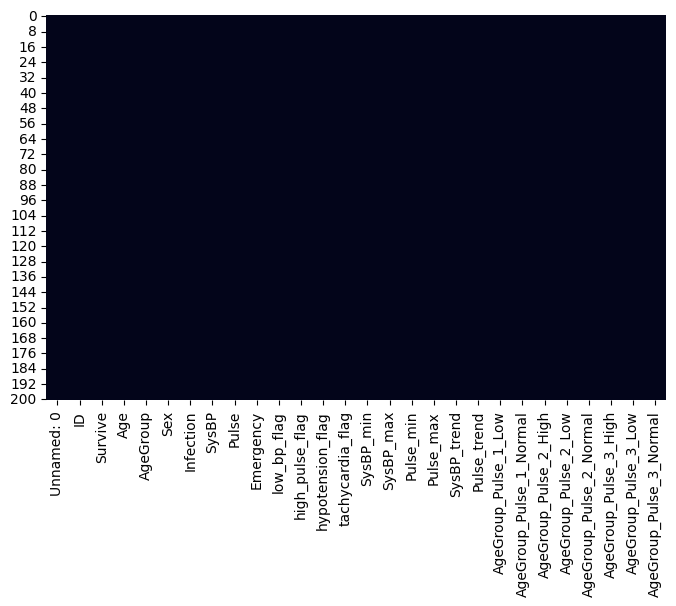

In [124]:
#  Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**Imputation**

In [125]:
# Loop to handle imputation for categorical and numerical columns separately
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column].fillna(df[column].mode()[0],
                          inplace=True)  # Impute with mode
    else:  # Column is numerical
        # Impute with median
        df[column].fillna(df[column].median(), inplace=True)

In [126]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Survive                    0
Age                        0
AgeGroup                   0
Sex                        0
Infection                  0
SysBP                      0
Pulse                      0
Emergency                  0
low_bp_flag                0
high_pulse_flag            0
hypotension_flag           0
tachycardia_flag           0
SysBP_min                  0
SysBP_max                  0
Pulse_min                  0
Pulse_max                  0
SysBP_trend                0
Pulse_trend                0
AgeGroup_Pulse_1_Low       0
AgeGroup_Pulse_1_Normal    0
AgeGroup_Pulse_2_High      0
AgeGroup_Pulse_2_Low       0
AgeGroup_Pulse_2_Normal    0
AgeGroup_Pulse_3_High      0
AgeGroup_Pulse_3_Low       0
AgeGroup_Pulse_3_Normal    0
dtype: int64

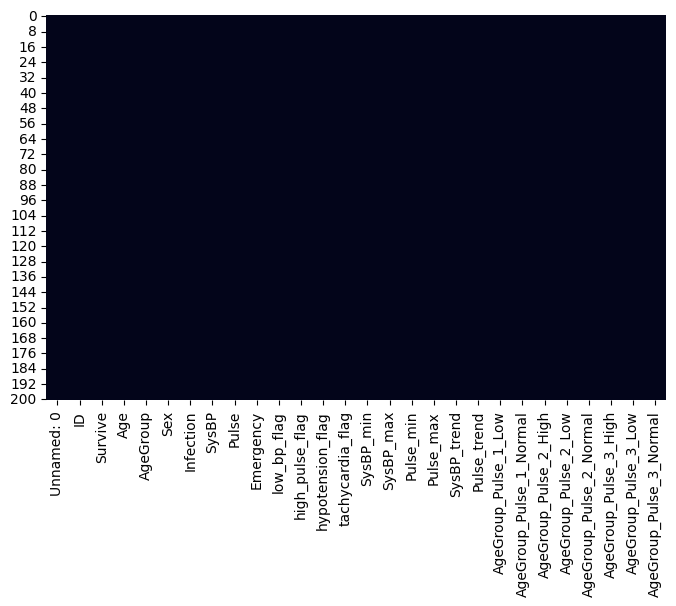

In [127]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**3.Dealing with outliers**

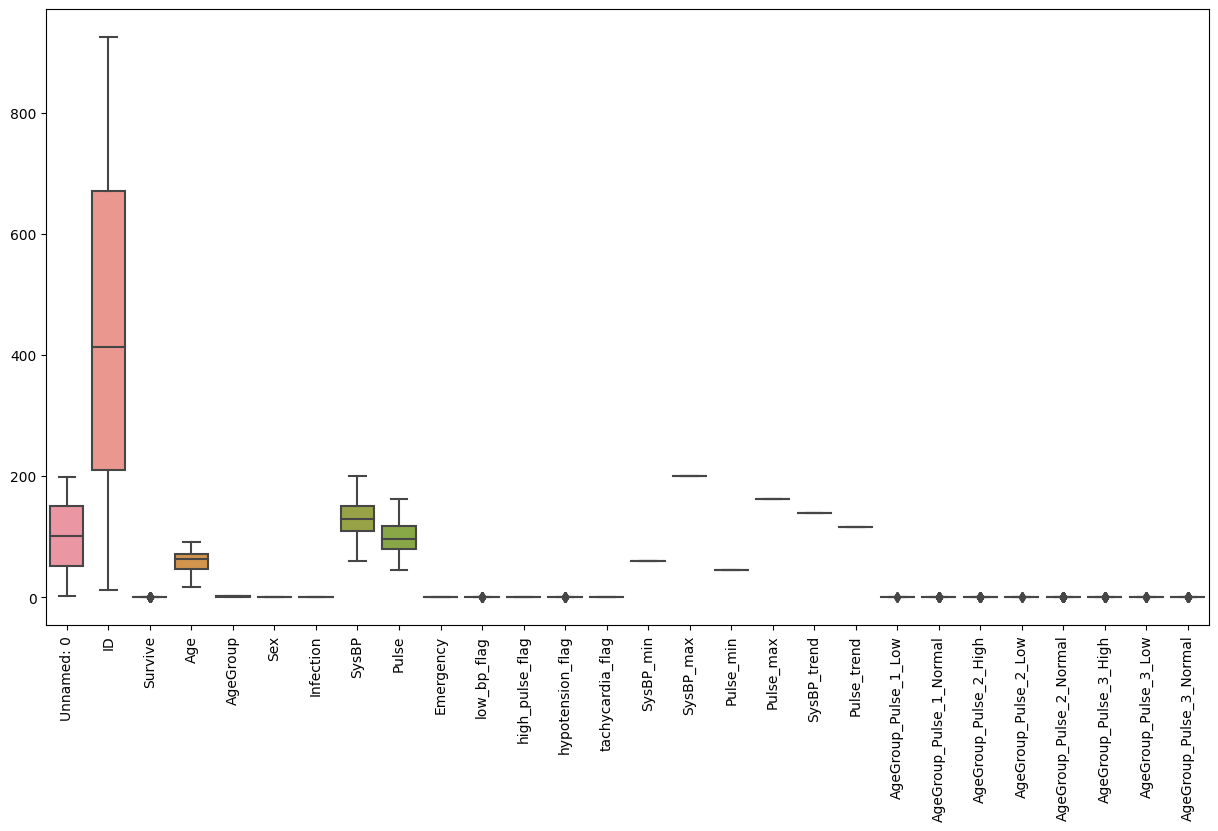

In [128]:
# Visualize outliers using boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

# Cap extreme values to a reasonable range (for demonstration)
for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = np.clip(df[col], q1, q99)


In [129]:
# Create a flag for low systolic blood pressure (hypotension)
df['low_bp_flag'] = (df['SysBP'] < 90).astype(int)

# Create a flag for high pulse rate (tachycardia)
df['high_pulse_flag'] = (df['Pulse'] > 100).astype(int)


In [130]:
# Create an interaction feature between age group and pulse
df['AgeGroup_Pulse'] = df['AgeGroup'].astype(str) + '_' + pd.cut(
    df['Pulse'], bins=[0, 60, 100, 200], labels=['Low', 'Normal', 'High']
).astype(str)


In [131]:
# Step 1: Data Cleaning - Ensure Numeric Data in Vital Columns
# Convert vital columns to numeric, coerce errors to NaN
df['SysBP'] = pd.to_numeric(df['SysBP'], errors='coerce')
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')

In [132]:
# Step 1.2: Handle Outliers using Medical Thresholds
def cap_outliers(series, lower_bound, upper_bound):
    """Caps values outside the given bounds."""
    return np.clip(series, lower_bound, upper_bound)

# Cap SysBP to a range of 60-200 mmHg
df['SysBP'] = cap_outliers(df['SysBP'], 60, 200)

# Cap Pulse to a range of 30-180 bpm
df['Pulse'] = cap_outliers(df['Pulse'], 30, 180)

In [133]:
# Step 2.1: Create Flags for Significant Events
df['hypotension_flag'] = (df['SysBP'] < 90).astype(int)
df['tachycardia_flag'] = (df['Pulse'] > 100).astype(int)

In [134]:

# Step 2.2: Calculate Trends in Vitals without grouping by 'ID'
# Check if necessary columns are numeric
df['SysBP'] = pd.to_numeric(df['SysBP'], errors='coerce')
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')


In [135]:
# Calculate max, min, and mean for SysBP and Pulse across the dataset
sysbp_min = df['SysBP'].min()
sysbp_max = df['SysBP'].max()
pulse_min = df['Pulse'].min()
pulse_max = df['Pulse'].max()

In [137]:
# Create a DataFrame for overall trends (if ID grouping fails)
overall_trends = pd.DataFrame({
    'SysBP_min': [sysbp_min],
    'SysBP_max': [sysbp_max],
    'Pulse_min': [pulse_min],
    'Pulse_max': [pulse_max],
})

overall_trends


,SysBP_min,SysBP_max,Pulse_min,Pulse_max
0,60.0,200.0,46.0,162.0


In [139]:
# Calculate trends
overall_trends['SysBP_trend'] = overall_trends['SysBP_max'] - overall_trends['SysBP_min']
overall_trends['Pulse_trend'] = overall_trends['Pulse_max'] - overall_trends['Pulse_min']

# Merge the overall trends back into the original dataset
df = pd.concat([df, overall_trends], ignore_index=True)

df.head()


,Unnamed: 0,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency,...,Pulse_trend,AgeGroup_Pulse_1_Low,AgeGroup_Pulse_1_Normal,AgeGroup_Pulse_2_High,AgeGroup_Pulse_2_Low,AgeGroup_Pulse_2_Normal,AgeGroup_Pulse_3_High,AgeGroup_Pulse_3_Low,AgeGroup_Pulse_3_Normal,AgeGroup_Pulse
0,3.0,12.0,0.0,87.0,3.0,1.0,1.0,80.0,96.0,1.0,...,116.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0_Normal
1,3.0,12.0,1.0,27.0,1.0,1.0,1.0,142.0,88.0,1.0,...,116.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0_Normal
2,3.0,12.0,1.0,59.0,2.0,0.0,0.0,112.0,80.0,1.0,...,116.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0_Normal
3,4.0,14.0,1.0,77.0,3.0,0.0,0.0,100.0,70.0,0.0,...,116.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0_Normal
4,5.0,27.0,0.0,76.0,3.0,1.0,1.0,128.0,90.0,1.0,...,116.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0_Normal


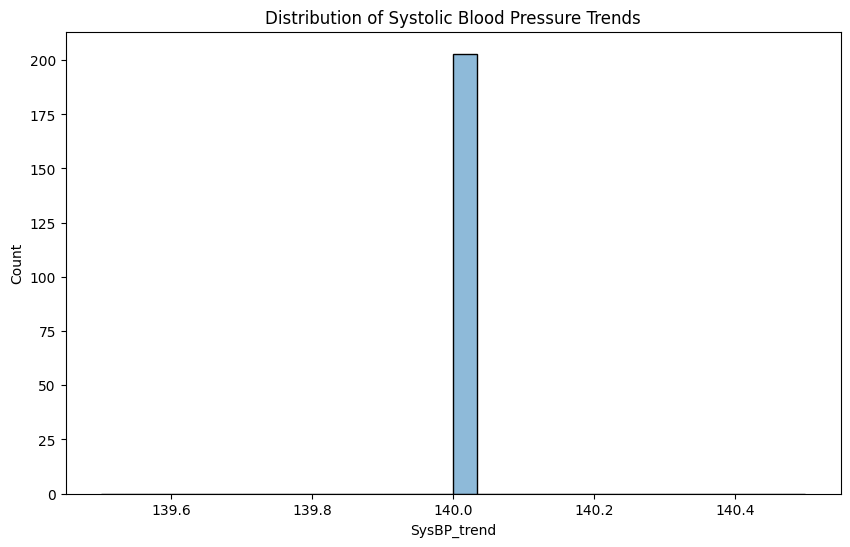

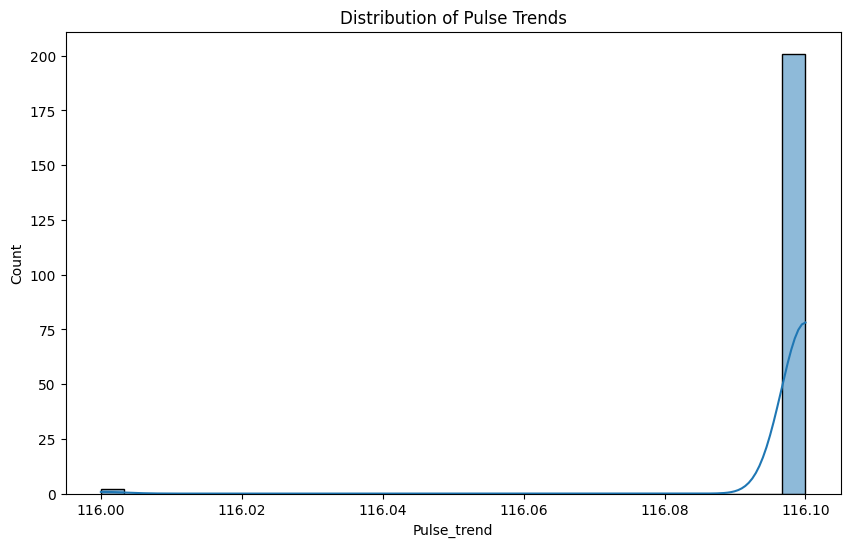

Processed Data Sample:
    Unnamed: 0    ID  Survive   Age  AgeGroup  Sex  Infection  SysBP  Pulse  \
0         3.0  12.0      0.0  87.0       3.0  1.0        1.0   80.0   96.0   
1         3.0  12.0      1.0  27.0       1.0  1.0        1.0  142.0   88.0   
2         3.0  12.0      1.0  59.0       2.0  0.0        0.0  112.0   80.0   
3         4.0  14.0      1.0  77.0       3.0  0.0        0.0  100.0   70.0   
4         5.0  27.0      0.0  76.0       3.0  1.0        1.0  128.0   90.0   

   Emergency  ...  Pulse_trend  AgeGroup_Pulse_1_Low  AgeGroup_Pulse_1_Normal  \
0        1.0  ...        116.1                   0.0                      0.0   
1        1.0  ...        116.1                   0.0                      1.0   
2        1.0  ...        116.1                   0.0                      0.0   
3        0.0  ...        116.1                   0.0                      0.0   
4        1.0  ...        116.1                   0.0                      0.0   

   AgeGroup_Pulse_2_

In [140]:
# Step 2.3: Visualize Trends Distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['SysBP_trend'].dropna(), bins=30, kde=True)
plt.title('Distribution of Systolic Blood Pressure Trends')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Pulse_trend'].dropna(), bins=30, kde=True)
plt.title('Distribution of Pulse Trends')
plt.show()

# Final Check
print("Processed Data Sample:\n", df.head())
print("Processed Data Shape:", df.shape)


In [141]:
# calculate missing values
print("----------------------------------------")
print(
    f"Missing values in each column:\n{df.isnull().sum().sort_values(ascending=False)}")
print("----------------------------------------")
print(
    f"Percentage of missing values in each column:\n{round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)}")

----------------------------------------
Missing values in each column:
Unnamed: 0                 2
hypotension_flag           2
AgeGroup_Pulse_3_Normal    2
AgeGroup_Pulse_3_Low       2
AgeGroup_Pulse_3_High      2
AgeGroup_Pulse_2_Normal    2
AgeGroup_Pulse_2_Low       2
AgeGroup_Pulse_2_High      2
AgeGroup_Pulse_1_Normal    2
AgeGroup_Pulse_1_Low       2
ID                         2
tachycardia_flag           2
AgeGroup_Pulse             2
high_pulse_flag            2
low_bp_flag                2
Emergency                  2
Pulse                      2
SysBP                      2
Infection                  2
Sex                        2
AgeGroup                   2
Age                        2
Survive                    2
SysBP_max                  0
Pulse_min                  0
Pulse_max                  0
SysBP_trend                0
Pulse_trend                0
SysBP_min                  0
dtype: int64
----------------------------------------
Percentage of missing values in e

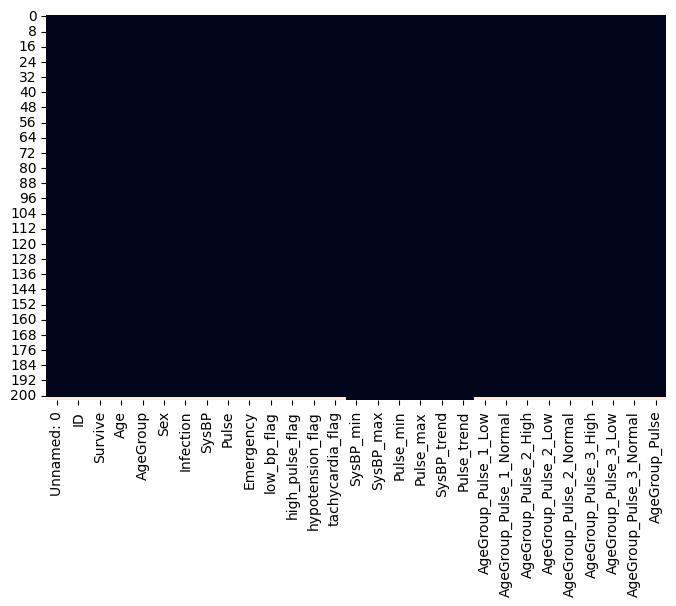

In [142]:
#  Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [144]:
# Loop to handle imputation for categorical and numerical columns separately
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column].fillna(df[column].mode()[0],
                          inplace=True)  # Impute with mode
    else:  # Column is numerical
        # Impute with median
        df[column].fillna(df[column].median(), inplace=True)

In [145]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Survive                    0
Age                        0
AgeGroup                   0
Sex                        0
Infection                  0
SysBP                      0
Pulse                      0
Emergency                  0
low_bp_flag                0
high_pulse_flag            0
hypotension_flag           0
tachycardia_flag           0
SysBP_min                  0
SysBP_max                  0
Pulse_min                  0
Pulse_max                  0
SysBP_trend                0
Pulse_trend                0
AgeGroup_Pulse_1_Low       0
AgeGroup_Pulse_1_Normal    0
AgeGroup_Pulse_2_High      0
AgeGroup_Pulse_2_Low       0
AgeGroup_Pulse_2_Normal    0
AgeGroup_Pulse_3_High      0
AgeGroup_Pulse_3_Low       0
AgeGroup_Pulse_3_Normal    0
AgeGroup_Pulse             0
dtype: int64

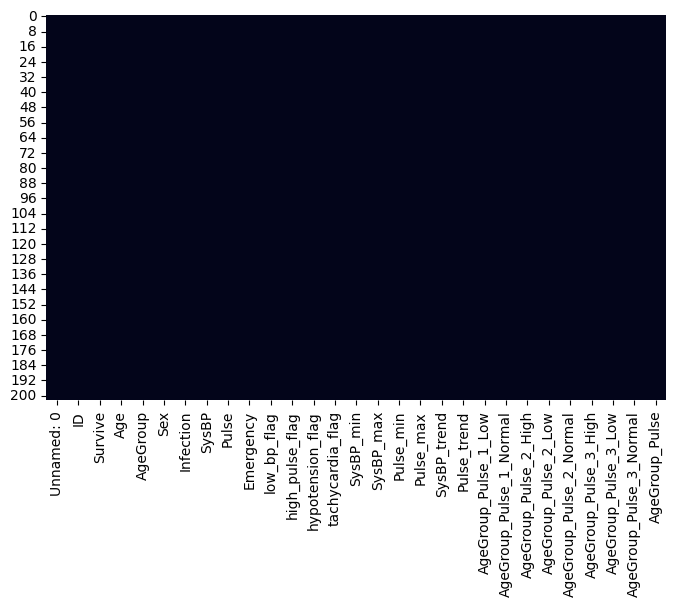

In [146]:
#  Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**Step 1.3: Handle Class Imbalance with SMOTE**

In [150]:

# Identify categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



Categorical Columns: []


In [170]:
# Check class distribution before SMOTE
print("Original class distribution:\n", y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())


Original class distribution:
 1.0    150
0.0     53
Name: Emergency, dtype: int64
Resampled class distribution:
 1.0    150
0.0    150
Name: Emergency, dtype: int64


**Machine Learning**

In [171]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(['ID', 'Survive', 'Emergency'], axis=1)
y = df['Emergency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Training set shape:", X_train.shape, "Testing set shape:", X_test.shape)


Training set shape: (240, 33) Testing set shape: (60, 33)


**Random Forest Classifier**

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


**Feature Importance**

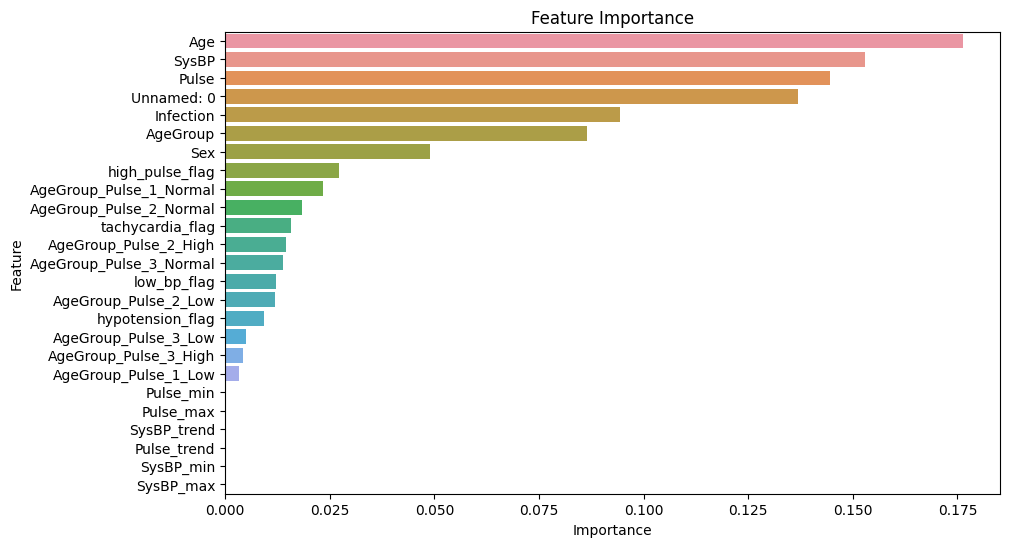

In [109]:
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [162]:
# Making final predictions on the test set
final_predictions = model.predict(X_test)
final_prediction_proba = model.predict_proba(X_test)[:, 1]

# Output predictions
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_predictions,
    'Prediction_Prob': final_prediction_proba
})

print(results_df.head())


     Actual  Predicted  Prediction_Prob
221     0.0        0.0             0.07
130     0.0        0.0             0.30
238     0.0        0.0             0.33
274     0.0        0.0             0.02
8       0.0        0.0             0.21


**Ensembling Technique**

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "Support Vector Classifier": SVC(probability=True)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracy = model.score(X_test, y_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        results[name] = {
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Classification Report': classification_report(y_test, y_pred, output_dict=True)
        }
    
    return results


**Evaluate all models**

In [173]:

results = evaluate_models(X_train, y_train, X_test, y_test)

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.2f}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("\n" + "="*50 + "\n")


Model: Logistic Regression
Accuracy: 0.82
ROC AUC: 0.89
Classification Report:
 {'0.0': {'precision': 0.8275862068965517, 'recall': 0.8, 'f1-score': 0.8135593220338982, 'support': 30}, '1.0': {'precision': 0.8064516129032258, 'recall': 0.8333333333333334, 'f1-score': 0.819672131147541, 'support': 30}, 'accuracy': 0.8166666666666667, 'macro avg': {'precision': 0.8170189098998888, 'recall': 0.8166666666666667, 'f1-score': 0.8166157265907197, 'support': 60}, 'weighted avg': {'precision': 0.8170189098998887, 'recall': 0.8166666666666667, 'f1-score': 0.8166157265907196, 'support': 60}}


Model: Decision Tree
Accuracy: 0.78
ROC AUC: 0.78
Classification Report:
 {'0.0': {'precision': 0.717948717948718, 'recall': 0.9333333333333333, 'f1-score': 0.8115942028985509, 'support': 30}, '1.0': {'precision': 0.9047619047619048, 'recall': 0.6333333333333333, 'f1-score': 0.7450980392156863, 'support': 30}, 'accuracy': 0.7833333333333333, 'macro avg': {'precision': 0.8113553113553114, 'recall': 0.7833333

**Result Viz & Performance Comparison**

<Figure size 1200x600 with 0 Axes>

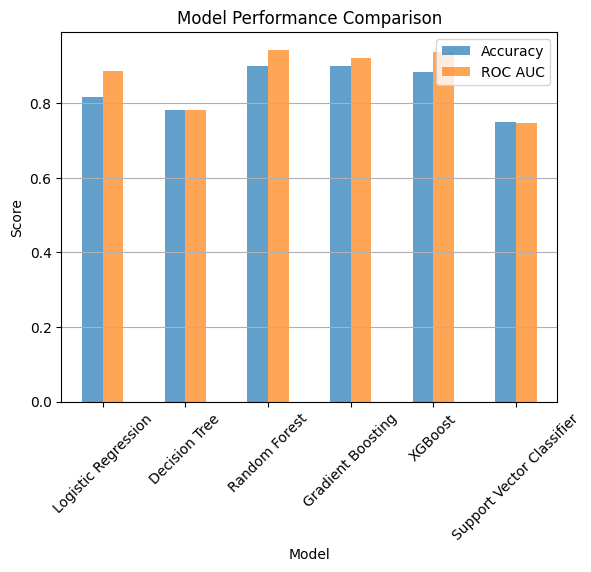

In [174]:
# Prepare data for visualization
model_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in model_names]
roc_aucs = [results[name]['ROC AUC'] for name in model_names]

# Create a DataFrame for easier plotting
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs
})

# Plot the results
plt.figure(figsize=(12, 6))
performance_df.set_index('Model').plot(kind='bar', alpha=0.7)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Model Evaluation**

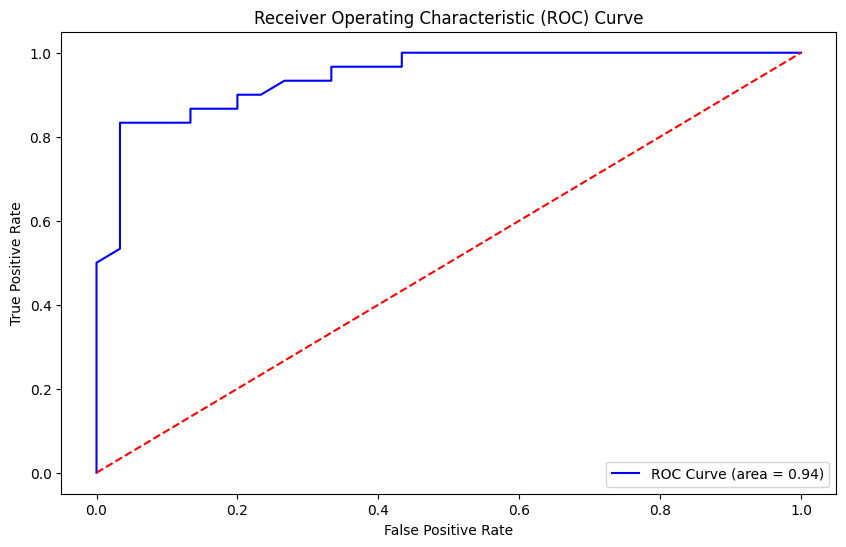

In [175]:


# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, final_prediction_proba))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91        30
         1.0       0.96      0.83      0.89        30

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60

ROC AUC Score: 0.9444444444444444


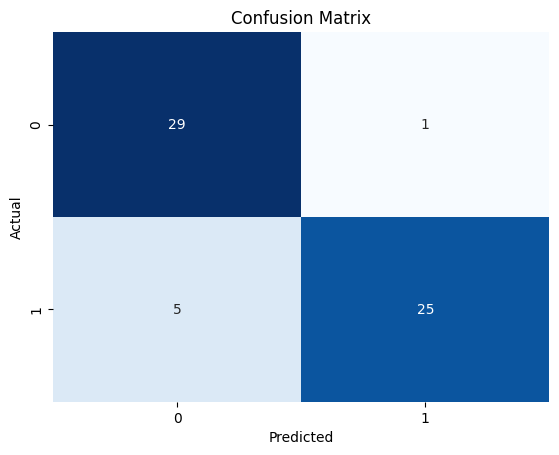

In [176]:
# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [177]:
# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91        30
         1.0       0.96      0.83      0.89        30

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60

ROC AUC Score: 0.9444444444444444


**Final Report/Analysis**

In this project, various machine learning models were applied to predict ICU readmissions based on patient data. 
The Random Forest and XGBoost models exhibited promising performance metrics, particularly in ROC AUC and accuracy. 
Future work may include hyperparameter tuning to enhance model performance further.